In [2]:
import pandas as pd

path = 'C:\\Users\\marsovc\\Desktop\\Fmf\\Dodiplomsko\\Financna 3. letnik\\Programiranje 1\\Projektna-naloga-PROG1\\podatki\\'


#združimo csvje v 2 df-ja: prihod in odhod
stolpci = ['Ime', 'Državljanstvo', 'Pozicija', 'Klub', 'Cena', 'Leto']
prihod = pd.DataFrame(columns=stolpci)
odhod = pd.DataFrame(columns=stolpci)

#povprečna cena pristopa
stevilo_prihodov = []
stevilo_odhodov = []

for i in range (2000,2020):
    transferIN = pd.read_csv(str(path+str(i)+'IN.csv'))
    prihod=prihod.append(transferIN)
    
    transferOUT = pd.read_csv(str(path+str(i)+'OUT.csv'))
    odhod=odhod.append(transferOUT)
    
prihod = prihod.reset_index(drop=True)
odhod = odhod.reset_index(drop=True)

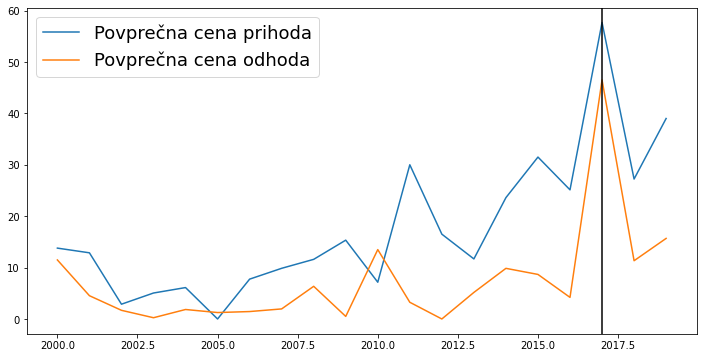

In [3]:
#poglejmo povprečno ceno prihodov in odhodov

avg_cena_prihod = prihod.groupby('Leto').mean()
avg_cena_odhod = odhod.groupby('Leto').mean()

import matplotlib.pyplot as pypt

pypt.figure(figsize=(12,6))
pypt.plot(range(2000,2020),avg_cena_prihod,label="Povprečna cena prihoda")
pypt.plot(range(2000,2020),avg_cena_odhod,label="Povprečna cena odhoda")
pypt.axvline(x=2017, ymin=0, ymax=1,color='Black')
pypt.legend(loc=2, prop={'size': 18})

pypt.show()

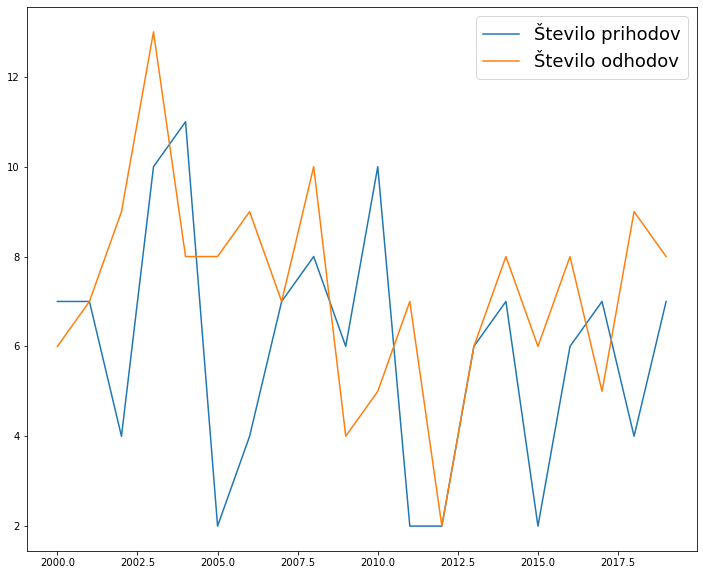

In [4]:
#Število prihodov in odhodov skozi leta
stevilo_prihodov = prihod.groupby('Leto').size()
stevilo_odhodov = odhod.groupby('Leto').size()

pypt.figure(figsize=(12,10))
pypt.plot(range(2000,2020),stevilo_prihodov,label="Število prihodov")
pypt.plot(range(2000,2020),stevilo_odhodov,label="Število odhodov")
pypt.legend(loc=1, prop={'size': 18})
pypt.show()

Text(0, 0.5, 'Število prestopov')

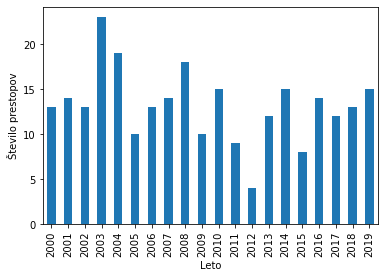

In [5]:
#število vseh prestopov v s histogramom
vsi = prihod.append(odhod)
vsi = vsi.reset_index(drop=True)
vsi = vsi.groupby('Leto').size()
graf = vsi.plot(kind='bar')
graf.set_ylabel('Število prestopov')

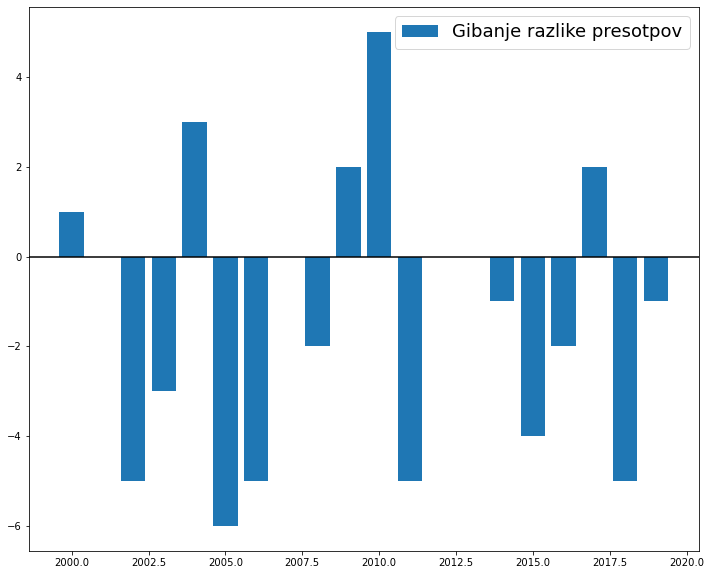

In [6]:
razlika = stevilo_prihodov - stevilo_odhodov

pypt.figure(figsize=(12,10))
razlika_graf = pypt.bar(range(2000,2020),razlika)
pypt.axhline(y=0,color='Black')

pypt.legend([razlika_graf], ['Gibanje razlike presotpov'],loc=1, prop={'size': 18})
pypt.show()


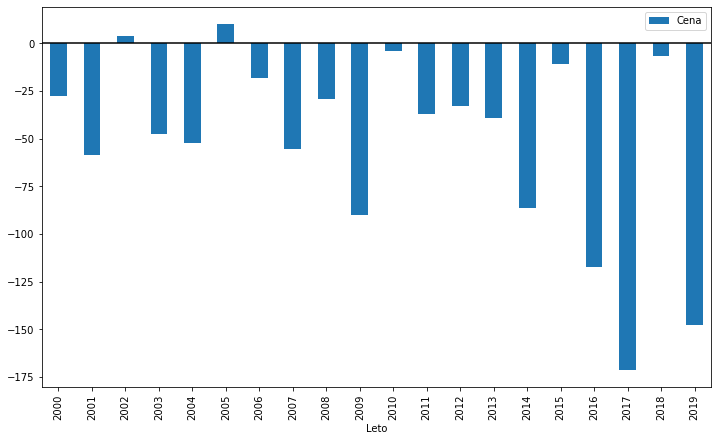

In [7]:
Cene = -prihod.groupby('Leto').sum() + odhod.groupby('Leto').sum()


Cene_graf = Cene.plot(kind='bar',figsize=(12,7))
pypt.axhline(y=0,color='Black')
pypt.legend()
pypt.show()

In [8]:
#Letna potrošnja v transferjih

Cene = -prihod.groupby('Leto').sum() + odhod.groupby('Leto').sum()

df = pd.DataFrame([(Cene.sum())['Cena']], columns=list(['Cena']))
Cene = Cene.append(df)
Cene.rename({0: 'Skupno'}, axis='index')

,Cena
2000,-27.60
2001,-58.40
2002,3.65
2003,-47.35
2004,-52.45
2005,10.00
2006,-18.00
2007,-55.30
2008,-29.25
2009,-90.00


In [9]:
#sedaj poglejmo kolikšna je povprečna cena/razlika prestopa glede na državo

x = prihod.Državljanstvo.unique()
y = odhod.Državljanstvo.unique()

avg_prihodov = prihod.groupby('Državljanstvo').mean().to_dict('index')
avg_odhodov = odhod.groupby('Državljanstvo').mean().to_dict('index')

vse_drzave = []
for i in y:
    vse_drzave.append(i)
for i in x:
    if i not in y:
        vse_drzave.append(i)
vse_drzave.sort()

vrednost = {}
for i in vse_drzave:
    if i in avg_prihodov:
        vrednost[i]= -(avg_prihodov[i])['Cena']
        if i in avg_odhodov:
            vrednost[i] = vrednost[i] + (avg_odhodov[i])['Cena']
    else:
        vrednost[i] = (avg_odhodov[i])['Cena']
    
avg = pd.DataFrame.from_dict(vrednost,orient='index')
avg.rename(columns={0: "Razlika povprečnih vrednosti prestopov v Mio.€"})

,Razlika povprečnih vrednosti prestopov v Mio.€
Argentina,-9.213889
Belarus,-5.900000
Belgium,-18.000000
Brazil,-7.008730
Cameroon,-21.500000
Chile,12.250000
Colombia,-11.800000
Croatia,-13.000000
England,22.112500
Finland,0.000000


In [21]:
#sedaj poglejmo kolikšna je povprečna cena transferja glede na državo (so brazilci najdražji?)
vsi = prihod.append(odhod)
x = vsi.groupby('Državljanstvo').mean()

št_prestopov = vsi.groupby('Državljanstvo').size()
št_prestopov.sort_values()

x[št_prestopov>=5].sort_values('Cena')

,Cena
Državljanstvo,
Mexico,3.550000
Argentina,5.947059
Italy,6.200000
Germany,7.080000
Spain,7.139583
Netherlands,8.131579
Sweden,13.000000
France,15.695652
Brazil,18.446154


In [11]:
x[št_prestopov>=10].sort_values('Cena')

,Cena
Državljanstvo,
Argentina,5.947059
Spain,7.139583
Netherlands,8.131579
France,15.695652
Brazil,18.446154


In [48]:
x = vsi.groupby('Državljanstvo')
x = x.sum()
x[x>50].sort_values('Cena').dropna()

,Cena
Državljanstvo,
Sweden,78.00
England,88.45
Chile,100.50
Uruguay,100.75
Argentina,101.10
Netherlands,154.50
Portugal,210.25
France,361.00
Spain,685.40


In [12]:
#katere pozicije FCB največ kupi in proda

poz_in = prihod.groupby('Pozicija').size()

mf = poz_in.loc[['CM','DM','MF']].sum()
poz_in.loc['MF'] = mf
poz_in = poz_in.drop(['CM','DM'])

df = poz_in.loc[['LB','RB','DF']].sum()
poz_in.loc['DF'] = df
poz_in = poz_in.drop(['LB','RB'])

fw = poz_in.loc[['FW','LW']].sum()
poz_in.loc['FW'] = fw
poz_in = poz_in.drop('LW')

s = pd.Series([poz_in.sum()], index=['Skupno'])
poz_in = poz_in.append(s).sort_values().to_frame()

poz_in.rename(columns={0: "Število prihodov"})

,Število prihodov
GK,14
FW,32
MF,35
DF,38
Skupno,119


In [49]:
poz_out = odhod.groupby('Pozicija').size()

mf = poz_out.loc[['CM','DM','MF','AM']].sum()
poz_out.loc['MF'] = mf
poz_out = poz_out.drop(['CM','DM', 'AM'])

df = poz_out.loc[['LB','RB','DF','LWB','CB']].sum()
poz_out.loc['DF'] = df
poz_out = poz_out.drop(['LB','RB','LWB','CB'])

s = pd.Series([poz_out.sum()], index=['Skupno'])
poz_out = poz_out.append(s).sort_values().to_frame()

poz_out.rename(columns={0: "Število odhodov"})

,Število odhodov
GK,14
MF,41
FW,43
DF,47
Skupno,145


In [51]:
#s katerimi pozicijami največ trguje (zavržem večkratne (po imenu))

vsi = prihod.append(odhod)
poz_vsi = vsi.drop_duplicates(subset='Ime')
poz_vsi = poz_vsi.groupby('Pozicija').size()

mf = poz_vsi.loc[['CM','DM','MF','AM']].sum() #LWB manjka (igralec pride in odide, vmes se lahko pozicija zamenja)
poz_vsi.loc['MF'] = mf
poz_vsi = poz_vsi.drop(['CM','DM', 'AM'])

df = poz_vsi.loc[['LB','RB','DF','CB']].sum()
poz_vsi.loc['DF'] = df
poz_vsi = poz_vsi.drop(['LB','RB','CB'])

s = pd.Series([poz_vsi.sum()], index=['Skupno'])
poz_vsi = poz_vsi.append(s).sort_values().to_frame()

poz_vsi.rename(columns={0: "Število vseh prestopov"})

,Število vseh prestopov
GK,20
FW,44
MF,60
DF,66
Skupno,190


In [15]:
vsi = prihod.append(odhod)
vsi = vsi.groupby('Državljanstvo').size().to_frame()
vsi.rename(columns={0: "Število prestopov"})

,Število prestopov
Državljanstvo,
Argentina,17
Belarus,3
Belgium,1
Brazil,39
Cameroon,4
Chile,4
Colombia,1
Croatia,2
England,4


In [16]:
vsi = prihod.append(odhod)
vsi = vsi.groupby('Leto').size()
s = pd.Series([vsi.sum()], index=['Skupno'])
vsi = vsi.append(s).to_frame()
vsi.rename(columns={0: "Število prestopov"})

,Število prestopov
2000,13
2001,14
2002,13
2003,23
2004,19
2005,10
2006,13
2007,14
2008,18
2009,10
